In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 1000
import scipy.stats as stats
import math


In [22]:
ozoneData2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/ozone_ny_data_2020.csv")
# ozoneData2020.head()

carbonMonoOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/carbonmonooxide_ny_data_2020.csv")
carbonMonoOxide2020.head()


,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,0,36,5,133,42101,1,40.8679,-73.87809,WGS84,Carbon monoxide,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",1/21/2021
1,1,36,5,133,42101,1,40.8679,-73.87809,WGS84,Carbon monoxide,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",1/21/2021
2,2,36,5,133,42101,1,40.8679,-73.87809,WGS84,Carbon monoxide,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",1/21/2021
3,3,36,5,133,42101,1,40.8679,-73.87809,WGS84,Carbon monoxide,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",1/21/2021
4,4,36,5,133,42101,1,40.8679,-73.87809,WGS84,Carbon monoxide,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,New York,Bronx,New York,35620,"New York-Newark-Jersey City, NY-NJ-PA",1/21/2021


In [23]:
missingValueCount=ozoneData2020.isnull().sum()
missingValueCount=carbonMonoOxide2020.isnull().sum()
print(missingValueCount)

Unnamed: 0                0
state_code                0
county_code               0
site_number               0
parameter_code            0
poc                       0
latitude                  0
longitude                 0
datum                     0
parameter                 0
sample_duration           0
pollutant_standard        0
date_local                0
units_of_measure          0
event_type                0
observation_count         0
observation_percent       0
validity_indicator        0
arithmetic_mean           0
first_max_value           0
first_max_hour            0
aqi                    3172
method_code               0
method                    0
local_site_name           0
site_address              0
state                     0
county                    0
city                      0
cbsa_code                 0
cbsa                      0
date_of_last_change       0
dtype: int64


In [28]:
ozoneData2020.shape
list(ozoneData2020.columns) 
print(ozoneData2020['method_code'].unique())
print(ozoneData2020['pollutant_standard'].unique())
grouped=ozoneData2020.groupby(['pollutant_standard'])
print(grouped['pollutant_standard'].count())
print(ozoneData2020['sample_duration'].unique())
print(ozoneData2020['units_of_measure'].unique())
print(ozoneData2020['event_type'].unique())



[87 47]
['Ozone 8-hour 2015' 'Ozone 1-hour 1979' 'Ozone 8-Hour 2008'
 'Ozone 8-Hour 1997']
pollutant_standard
Ozone 1-hour 1979    9221
Ozone 8-Hour 1997    9206
Ozone 8-Hour 2008    9206
Ozone 8-hour 2015    9181
Name: pollutant_standard, dtype: int64
['8-HR RUN AVG BEGIN HOUR' '1 HOUR']
['Parts per million']
['None']


In [24]:
carbonMonoOxide2020.shape
print(carbonMonoOxide2020.dtypes)
print(carbonMonoOxide2020['method_code'].unique())
print(carbonMonoOxide2020['pollutant_standard'].unique())
grouped=carbonMonoOxide2020.groupby(['pollutant_standard'])
print(carbonMonoOxide2020['pollutant_standard'].count())
print(carbonMonoOxide2020['sample_duration'].unique())
print(carbonMonoOxide2020['units_of_measure'].unique())
print(carbonMonoOxide2020['event_type'].unique())

list(carbonMonoOxide2020.columns) 

Unnamed: 0               int64
state_code               int64
county_code              int64
site_number              int64
parameter_code           int64
poc                      int64
latitude               float64
longitude              float64
datum                   object
parameter               object
sample_duration         object
pollutant_standard      object
date_local              object
units_of_measure        object
event_type              object
observation_count        int64
observation_percent      int64
validity_indicator      object
arithmetic_mean        float64
first_max_value        float64
first_max_hour           int64
aqi                    float64
method_code              int64
method                  object
local_site_name         object
site_address            object
state                   object
county                  object
city                    object
cbsa_code                int64
cbsa                    object
date_of_last_change     object
dtype: o

['Unnamed: 0',
 'state_code',
 'county_code',
 'site_number',
 'parameter_code',
 'poc',
 'latitude',
 'longitude',
 'datum',
 'parameter',
 'sample_duration',
 'pollutant_standard',
 'date_local',
 'units_of_measure',
 'event_type',
 'observation_count',
 'observation_percent',
 'validity_indicator',
 'arithmetic_mean',
 'first_max_value',
 'first_max_hour',
 'aqi',
 'method_code',
 'method',
 'local_site_name',
 'site_address',
 'state',
 'county',
 'city',
 'cbsa_code',
 'cbsa',
 'date_of_last_change']

In [19]:


#removing country_code and state_code because it is same for all data points

ozoneData2020New=ozoneData2020[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','state']].copy()

ozoneData2020New = ozoneData2020New[ozoneData2020New['pollutant_standard'] == "Ozone 8-hour 2015"] 
print(ozoneData2020New.shape)

#----begin converting date_local column type from object to datetime64-------

# #ozoneData2020New['date_local']=pd.to_datetime(ozoneData2020New['date_local'])
# print(ozoneData2020New.dtypes)
# #ozoneData2020New.index=ozoneData2020New['date_local']
# #del ozoneData2020New['date_local']

# did not convert date beacuse matplotlib is giving error while plotting for  datetime64

#-----end converting date_local column type from object to datetime64
missingValueCount=ozoneData2020New.isnull().sum()
print(missingValueCount)

                               



(9181, 12)
date_local            0
county_code           0
site_number           0
parameter             0
sample_duration       0
pollutant_standard    0
validity_indicator    0
arithmetic_mean       0
first_max_value       0
aqi                   0
local_site_name       0
state                 0
dtype: int64


In [20]:
### count of different sites through out new york state###

grouped=ozoneData2020New.groupby(['site_number'])
print(grouped['site_number'].count())


site_number
2       1241
3        997
4        539
5        958
6        332
7        304
9        299
12       301
110      334
111      252
124      363
133      335
135      334
1006     334
1007     365
1015     331
2004     302
3001     303
5001     299
9991     658
Name: site_number, dtype: int64


In [21]:
print(ozoneData2020New['validity_indicator'].unique())
grouped=ozoneData2020New.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())

######Remove Invalid Values ######
ozoneData2020New = ozoneData2020New[ozoneData2020New['validity_indicator'] == "Y"] 
print(ozoneData2020New.shape)
ozoneData2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/ozone_ny_data_2020.csv')




['Y' 'N']
validity_indicator
N     182
Y    8999
Name: validity_indicator, dtype: int64
(8999, 12)


In [14]:
### count of different sites through out new york state###




print(MeanMeasuredValue)
#grouped.hist()


# sigma = math.sqrt(variance)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# print(x)
# plt.plot(x, stats.norm.pdf(x, mu, sigma))
# plt.show()




date_local
1/1/2020     0.027988
1/10/2020    0.021299
1/11/2020    0.025643
1/12/2020    0.027627
1/13/2020    0.013371
               ...   
9/5/2020     0.028537
9/6/2020     0.031994
9/7/2020     0.028834
9/8/2020     0.025260
9/9/2020     0.025262
Name: arithmetic_mean, Length: 364, dtype: float64


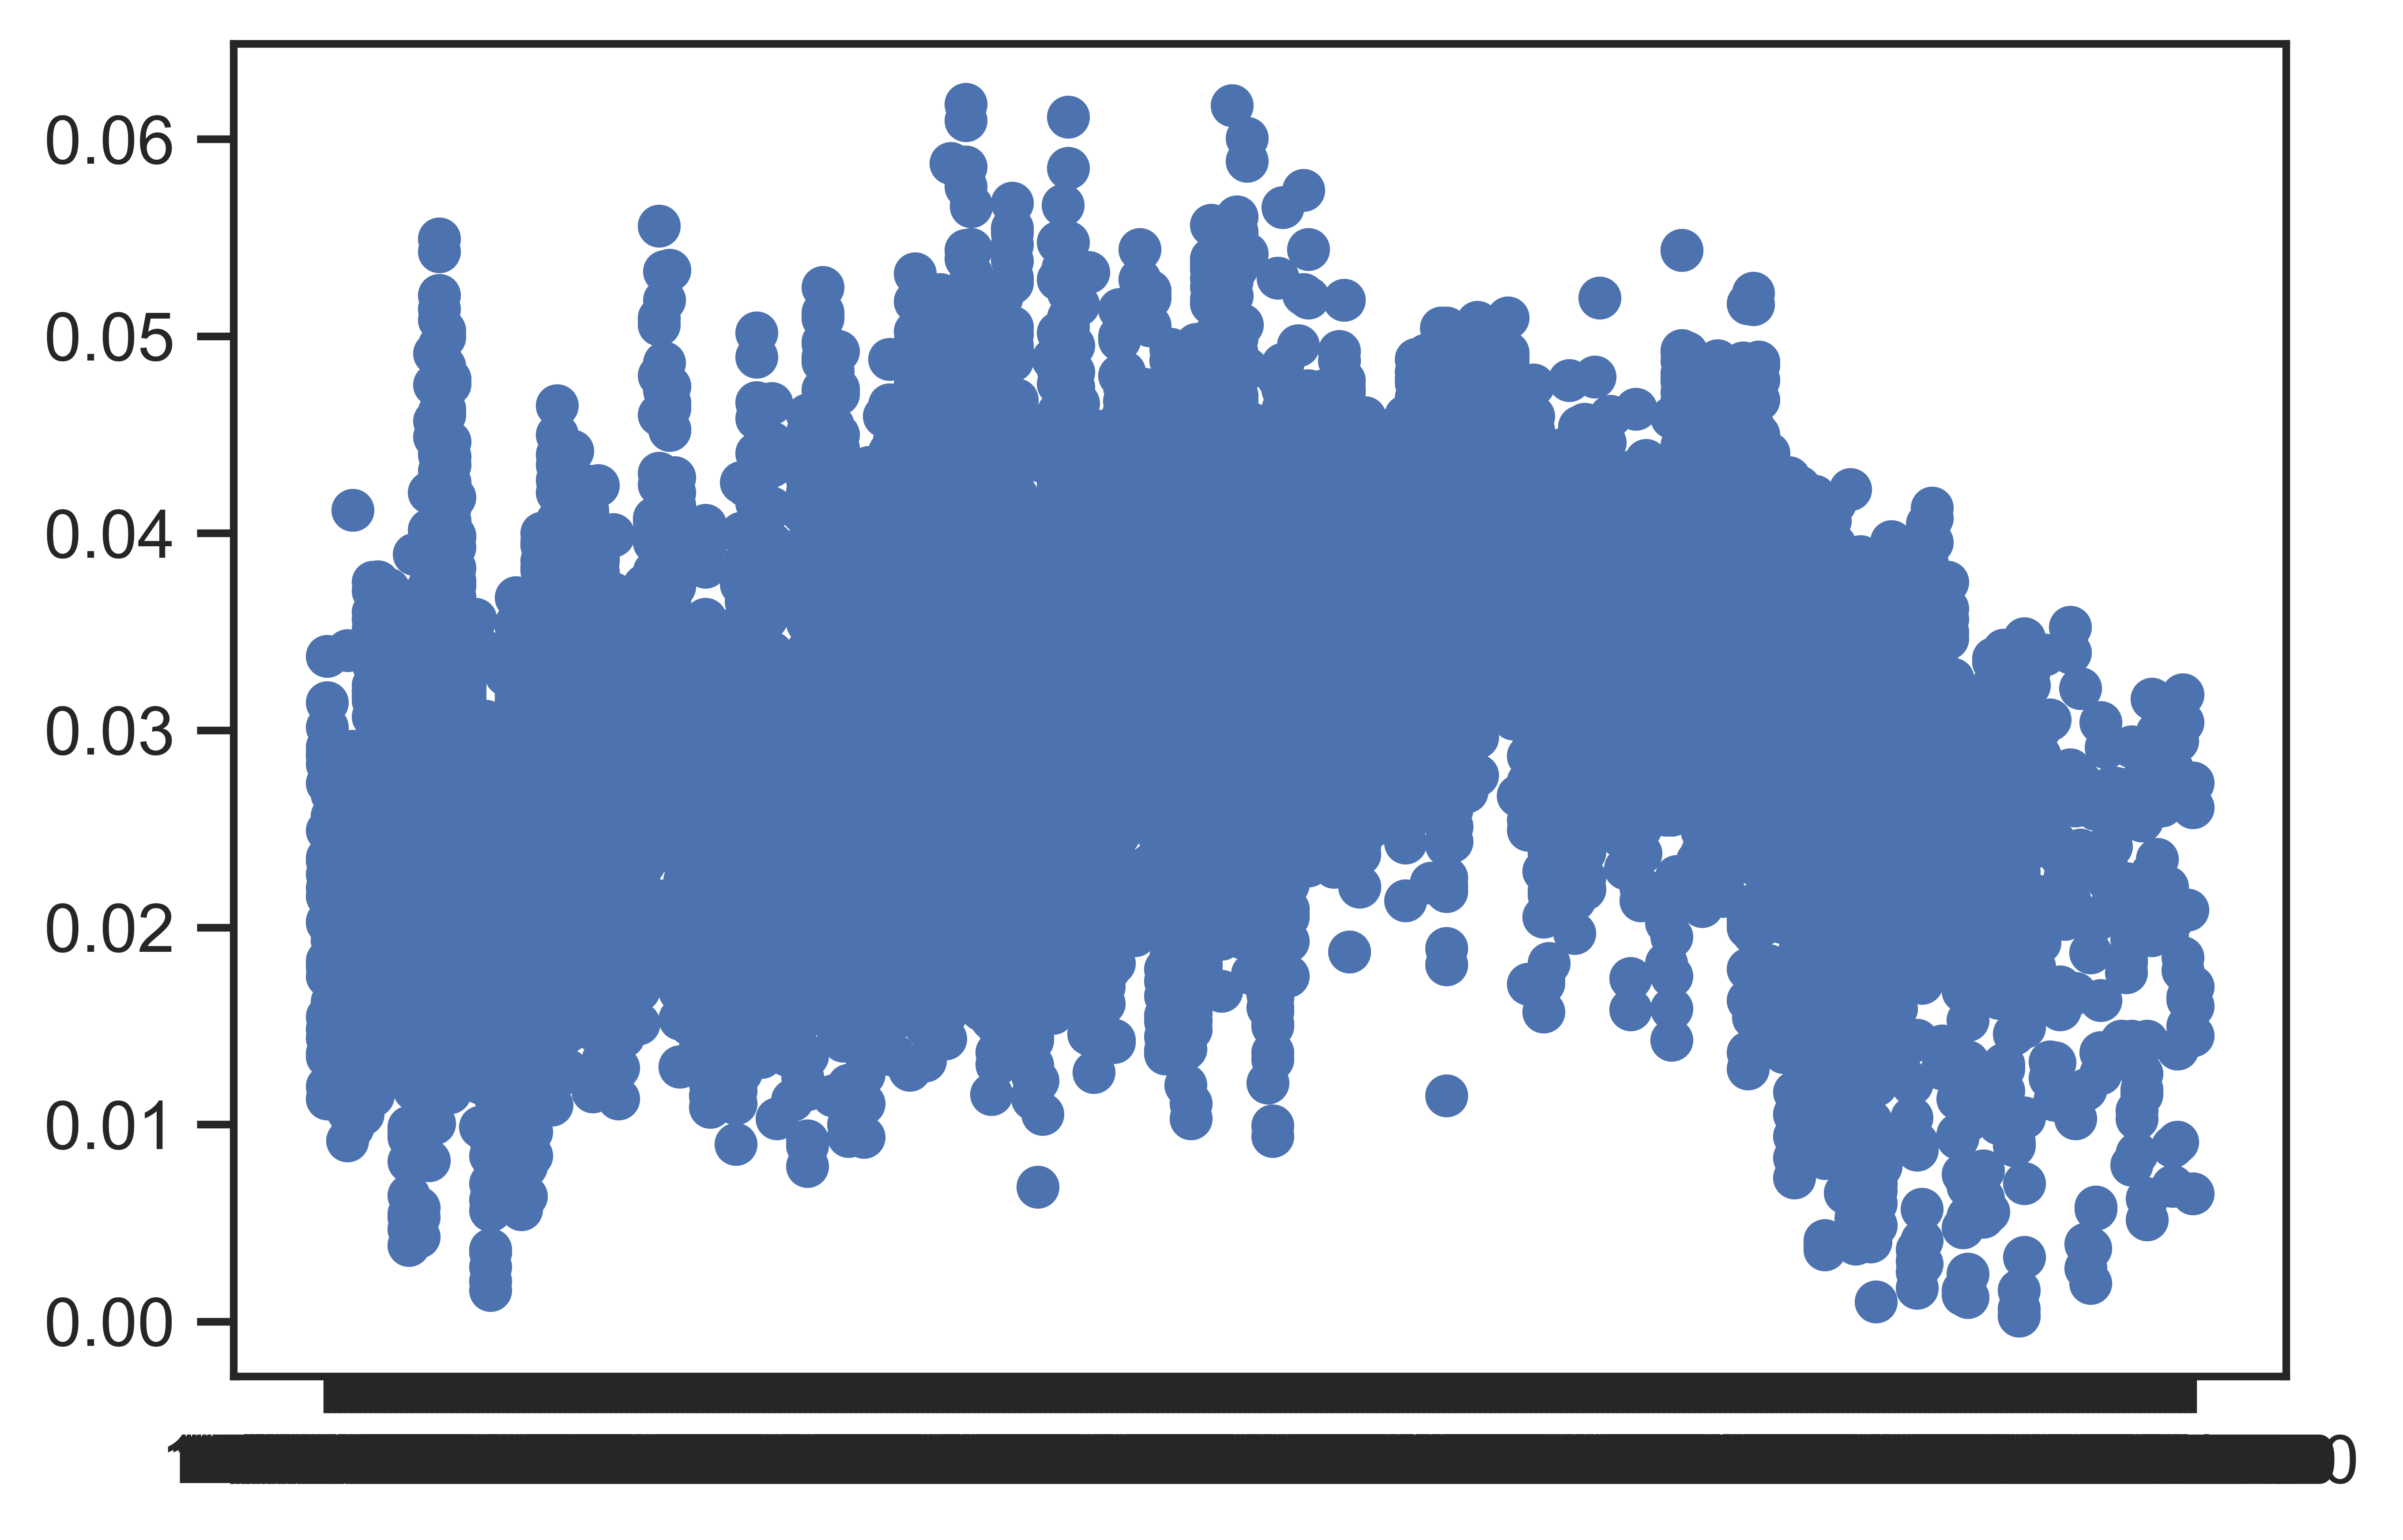

In [65]:
#group by date and average
plt.scatter(x=ozoneData2020New['date_local'], y=ozoneData2020New['arithmetic_mean'])

In [ ]:
sns.pairplot(df, hue="species")